# Analyzing Road Accident dataset

In this Project we Analyse The "Road Accident" dataset to compile statistical information regarding traffic incidents. It encompasses variables such as accident types, locations, vehicles involved, casualties, and contributing factors like weather or road conditions. Analyzing this data aids in understanding patterns, improving safety measures, and developing effective traffic management strategies.

## 0. Libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from datetime import datetime, date
import warnings

In [2]:
%%HTML
<style type='text/css'>
table.dataframe td, table.dataframe th
{
    border-style: solid
}

**Loading data**

In [3]:
df = pd.read_csv('Road Accident Data.csv')
df.head(3)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car


In [4]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


## 1. Data Cleaning PreProcessing

**Showing missing values in a heatmap**

<Axes: >

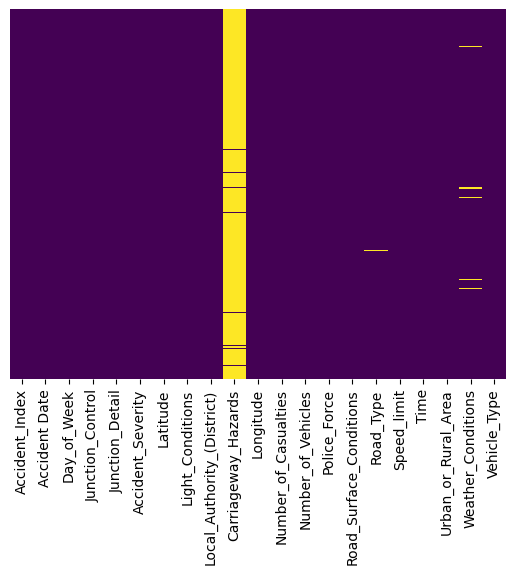

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

**Percentage of the missing values**

In [6]:
df.isnull().sum() / df.shape[0] * 100

Accident_Index                 0.000000
Accident Date                  0.000000
Day_of_Week                    0.000000
Junction_Control               0.000000
Junction_Detail                0.000000
Accident_Severity              0.000000
Latitude                       0.000000
Light_Conditions               0.000000
Local_Authority_(District)     0.000000
Carriageway_Hazards           98.238807
Longitude                      0.000000
Number_of_Casualties           0.000000
Number_of_Vehicles             0.000000
Police_Force                   0.000000
Road_Surface_Conditions        0.102931
Road_Type                      0.498096
Speed_limit                    0.000000
Time                           0.005520
Urban_or_Rural_Area            0.000000
Weather_Conditions             1.966731
Vehicle_Type                   0.000000
dtype: float64

**Dropping `Carriageway_Hazards` column because it has more than 50% of NAN**

In [7]:
df.drop(['Carriageway_Hazards'], axis=1, inplace=True)

**Dropping NAN rows**

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

<Axes: >

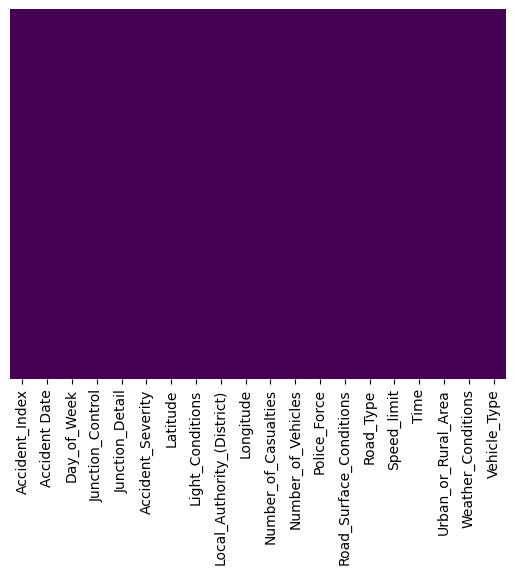

In [10]:
# Showing missing values in a heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

## 2. What is the trend in road accidents over time?
* Analyze the 'Accident Date' column to identify trends in the frequency of accidents over months or years. 

In [11]:
# converting ['Accident Date'] column to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

In [12]:
# Extract year and month from 'Accident Date' columns
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month_name()

In [13]:
# Count the number of accidents per month and year
monthly_counts = df.groupby(['Year', 'Month']).size().sort_values(ascending=False).reset_index(name='Number_of_Casualties')
monthly_counts[:10]

,Year,Month,Number_of_Casualties
0,2021,November,15043
1,2021,October,14485
2,2021,July,13949
3,2021,June,13583
4,2021,September,13484
5,2021,May,13395
6,2021,December,13365
7,2022,November,13298
8,2022,October,13216
9,2021,August,13113


***Interpretation***
 
We can see that most Number of Casualties happened in November 2021 and followed by October 2021, and again most Number of Casualties in 2022 happened in November

## 3. Which day of the week has the highest number of accidents?
* lets Use 'Day_of_Week' to determine if accidents are more common on weekends, weekdays, or specific days like Fridays or Mondays.

### 3.1 Day of the Week that has the highest Number_of_Casualties in single day

In [14]:
df_day_acc = df.groupby('Day_of_Week')['Number_of_Casualties'].max().sort_values(ascending=False)
df_day_acc

Day_of_Week
Tuesday      48
Friday       43
Monday       40
Thursday     26
Saturday     22
Wednesday    21
Sunday       17
Name: Number_of_Casualties, dtype: int64

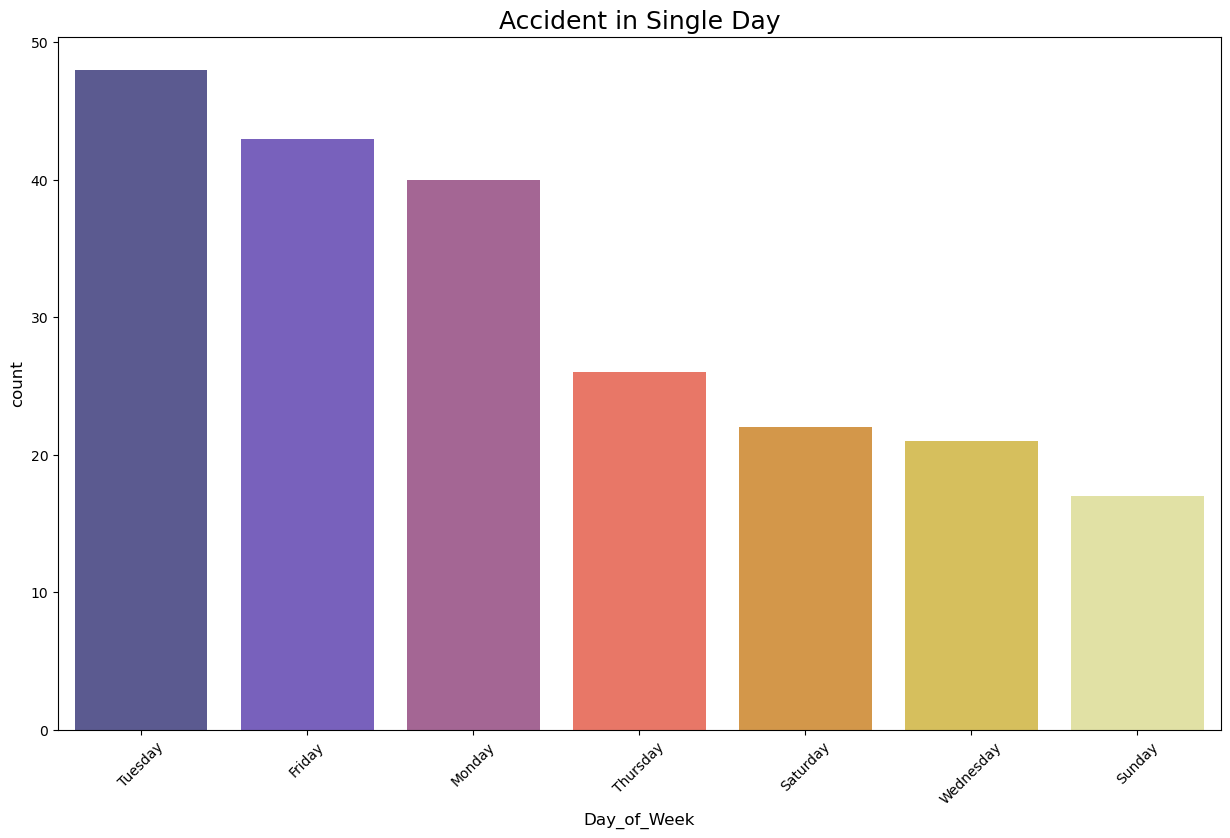

In [15]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,9))
sns.barplot(x = df_day_acc.index, y = df_day_acc.values, alpha=0.8,palette='CMRmap')
plt.title('Accident in Single Day', fontsize=18)
plt.ylabel('count', fontsize=12)
plt.xlabel('Day_of_Week', fontsize=12)
plt.xticks(rotation=45)
plt.show()

***Interpretation***
 
we can see that from the visual, that Tuesday was the day with the most Number of Casualties and Sunday is the day with the least number of Casualties in a single day

### 3.2 Day of the Week that has most Accident 

In [16]:
df_week = df['Day_of_Week'].value_counts().head(10)
df_week

Day_of_Week
Friday       49287
Wednesday    45331
Tuesday      45221
Thursday     44495
Monday       42855
Saturday     40546
Sunday       32760
Name: count, dtype: int64

***Interpretation***

Most accident happend on Friday which it might make sense because most people are coming from work and are in a hurry to get back home and rest, and some might be going to vacation since is Friday.

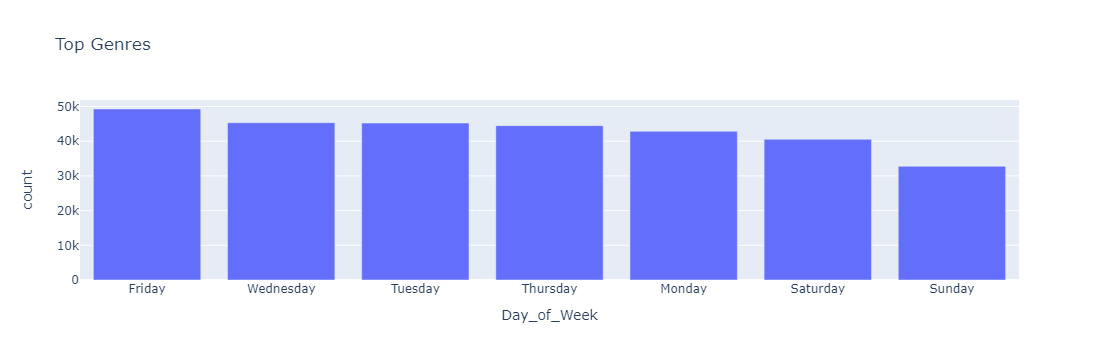

In [54]:
bar = px.bar( x = df_week.index, y =  df_week.values, title='Top Genres', hover_name=df_week.index[:15],
        color_continuous_scale='Agsunset'
)
bar.update_layout(xaxis_title='Day_of_Week', yaxis_title='count',  coloraxis_showscale=False)
bar.show()

## 4. How does the severity of accidents vary based on junction control types?
* Lets Group accidents by 'Junction_Control' and analyze the distribution of 'Accident_Severity' 
to understand if certain junction control types are associated with more severe accidents.

In [18]:
df.Accident_Severity= df.Accident_Severity.astype(str).str.replace('Fetal', "Fatal")

In [19]:
df_severity =  df['Accident_Severity'].value_counts()
df_severity

Accident_Severity
Slight     256519
Serious     40084
Fatal        3892
Name: count, dtype: int64

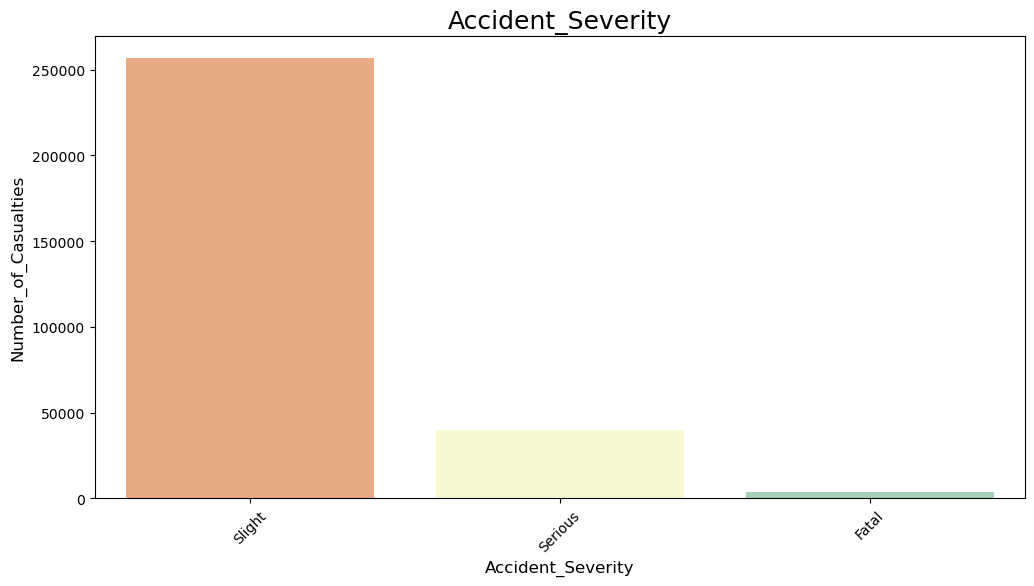

In [20]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_severity.index, y = df_severity.values, alpha=0.8,palette='Spectral')
plt.title('Accident_Severity', fontsize=18)
plt.ylabel('Number_of_Casualties', fontsize=12)
plt.xlabel('Accident_Severity', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [21]:
df_junc_acc = df.groupby(['Junction_Control', 'Accident_Severity']).size().sort_values(ascending=False).reset_index(name='Number_of_Casualties')
df_junc_acc

,Junction_Control,Accident_Severity,Number_of_Casualties
0,Give way or uncontrolled,Slight,127346
1,Data missing or out of range,Slight,78823
2,Auto traffic signal,Slight,27936
3,Not at junction or within 20 metres,Slight,20458
4,Give way or uncontrolled,Serious,17957
5,Data missing or out of range,Serious,14723
6,Not at junction or within 20 metres,Serious,3941
7,Auto traffic signal,Serious,3239
8,Data missing or out of range,Fatal,1881
9,Stop sign,Slight,1471


In [22]:
df['Junction_Control'].value_counts()

Junction_Control
Give way or uncontrolled               146515
Data missing or out of range            95427
Auto traffic signal                     31471
Not at junction or within 20 metres     24889
Stop sign                                1655
Authorised person                         449
Auto traffic sigl                          89
Name: count, dtype: int64

***Interpretation***

* Slight:

The vast majority of accidents result in slight injuries. These might include minor cuts, bruises, or whiplash that do not require extensive medical treatment. The high number of slight injuries suggests that while accidents are common, many do not result in severe harm to those involved

* Serious:

A significant number of accidents result in serious injuries. These injuries are more severe and typically require medical attention and possibly hospitalization. Serious injuries can include fractures, significant lacerations, internal injuries, and other trauma that has a substantial impact on the victims' health

* Fatal

A smaller, but still significant, number of accidents result in fatalities. Fatal accidents represent the most severe outcome and indicate instances where the injuries sustained were so severe that they led to the loss of life. The number of fatalities highlights the critical importance of road safety measures
 


## 5. What are the most common types of road junctions where accidents occur?
* Lets Use 'Junction_Detail' to identify common junction types (e.g., roundabouts, T-junctions) where accidents occur frequently.

In [23]:
df_junct = df.Junction_Detail.value_counts()
df_junct

Junction_Detail
Not at junction or within 20 metres    119987
T or staggered junction                 94696
Crossroads                              29354
Roundabout                              26524
Private drive or entrance               10518
Other junction                           7923
Slip road                                4192
More than 4 arms (not roundabout)        4029
Mini-roundabout                          3272
Name: count, dtype: int64

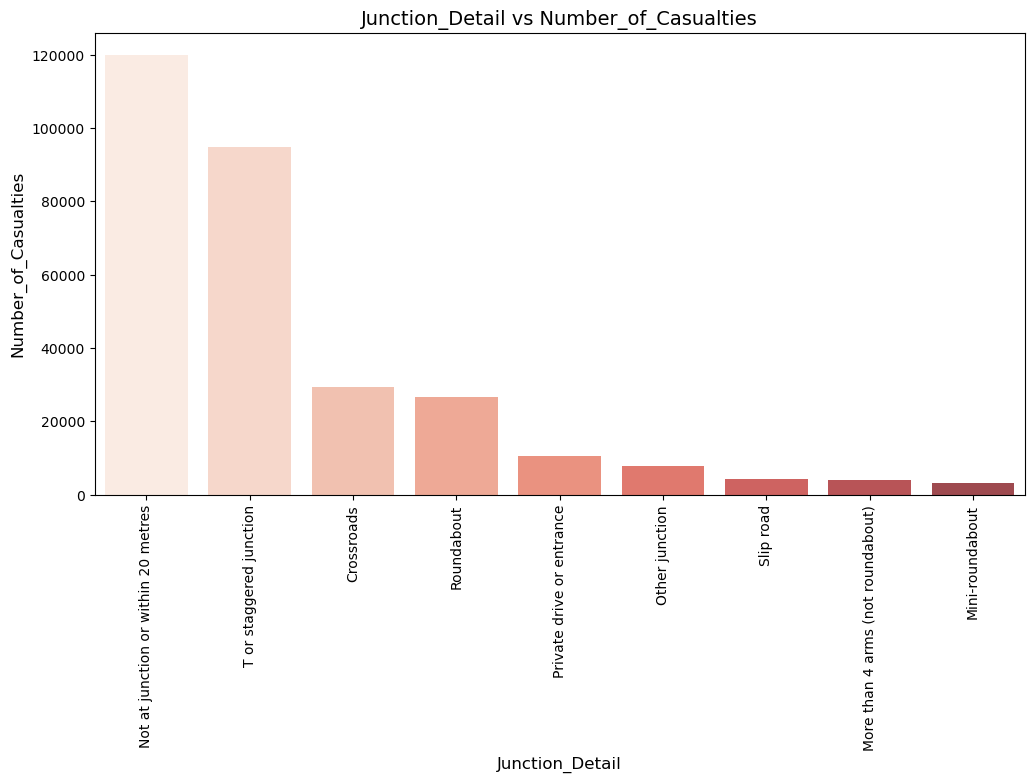

In [24]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_junct .index, y = df_junct .values, alpha=0.8,palette='Reds')
plt.title('Junction_Detail vs Number_of_Casualties', fontsize=14)
plt.ylabel('Number_of_Casualties', fontsize=12)
plt.xlabel('Junction_Detail', fontsize=12)
plt.xticks(rotation=90)
plt.show()

**Interpretation**

* Not at junction or within 20 metres
  
This is the highest number in the dataset, indicating that a significant majority of accidents happen away from intersections and junctions. It suggests that many accidents occur on stretches of road where vehicles are likely traveling at higher speeds

* T or staggered junction
  
A large number of accidents occur at T or staggered junctions, which are common points of traffic flow where vehicles must yield or turn, increasing the risk of collisions.

* Mini-roundabout
  
Mini-roundabouts have the lowest accident count, reflecting their use in managing lower-speed and lower-traffic areas, making them less prone to severe collisions.

## 6. Does the light condition influence accident severity?
* Lets Analyze 'Light_Conditions' and 'Accident_Severity' to determine if accidents 
occurring in darker conditions (e.g., night-time, twilight) are more severe.

In [25]:
df.groupby(['Light_Conditions', 'Accident_Severity']).size().sort_values(ascending=False).reset_index(name='Number_of_Casualties')

,Light_Conditions,Accident_Severity,Number_of_Casualties
0,Daylight,Slight,191312
1,Darkness - lights lit,Slight,49753
2,Daylight,Serious,28209
3,Darkness - no lighting,Slight,12604
4,Darkness - lights lit,Serious,8401
5,Darkness - no lighting,Serious,3038
6,Daylight,Fatal,2363
7,Darkness - lighting unknown,Slight,1899
8,Darkness - lights unlit,Slight,951
9,Darkness - lights lit,Fatal,855


In [26]:
df_light = df['Light_Conditions'].value_counts()
df_light

Light_Conditions
Daylight                       221884
Darkness - lights lit           59009
Darkness - no lighting          16277
Darkness - lighting unknown      2216
Darkness - lights unlit          1109
Name: count, dtype: int64

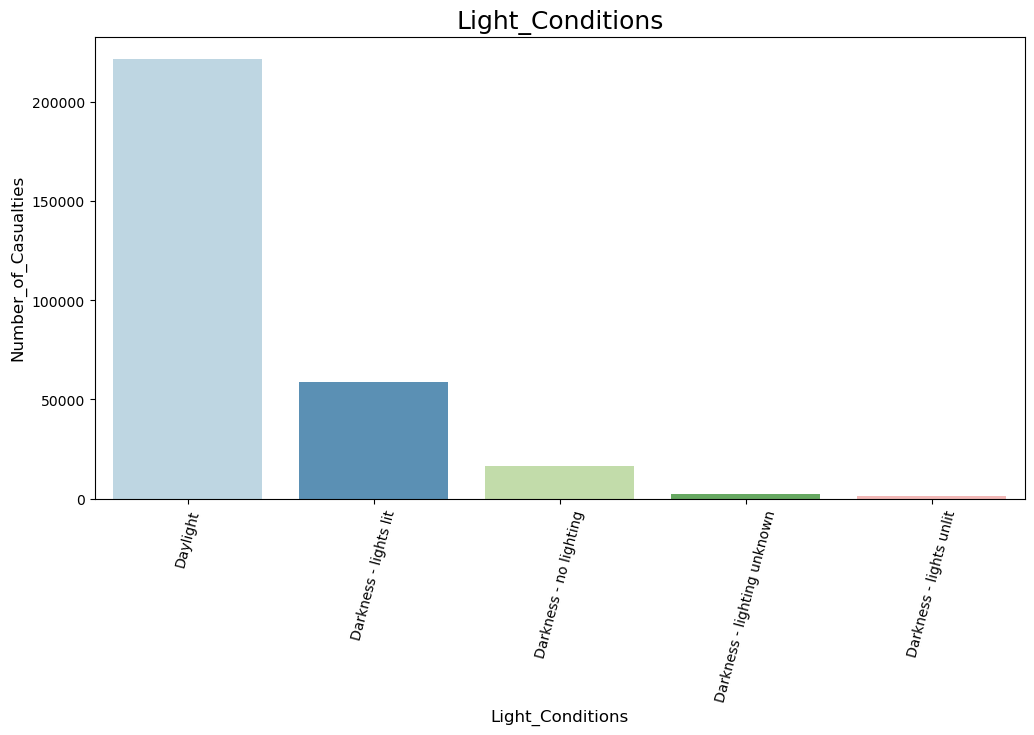

In [27]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_light.index, y = df_light.values, alpha=0.8,palette='Paired')
plt.title('Light_Conditions', fontsize=18)
plt.ylabel('Number_of_Casualties', fontsize=12)
plt.xlabel('Light_Conditions', fontsize=12)
plt.xticks(rotation=75)
plt.show()

**Interpretation**

* Daylight

The vast majority of accidents occur during daylight hours. This could be attributed to higher traffic volumes during the day as people commute for work, school, and other activities. The higher exposure to road use naturally leads to a higher incidence of accidents.

* Darkness - lights lit:

A significant number of accidents happen during nighttime with streetlights on. While visibility is reduced compared to daylight, the presence of street lighting helps mitigate some of the risks, though nighttime driving still presents challenges like reduced reaction times and visibility

* Darkness - lights unlit

The lowest number of accidents occurs in conditions where there are streetlights present but they are not lit. This scenario is particularly hazardous as drivers might expect illumination and be caught off guard by the darkness, leading to a higher risk of accidents.

## 7. How do weather conditions affect road accidents?
* Exploring the relationship between 'Weather_Conditions' and 'Accident_Severity' to understand 
if factors like rain, snow, or fog contribute to more severe accidents.

In [28]:
df_weather =  df.Weather_Conditions.value_counts()
df_weather

Weather_Conditions
Fine no high winds       243333
Raining no high winds     34733
Other                      8752
Snowing no high winds      4815
Raining + high winds       3508
Fine + high winds          3136
Fog or mist                1681
Snowing + high winds        537
Name: count, dtype: int64

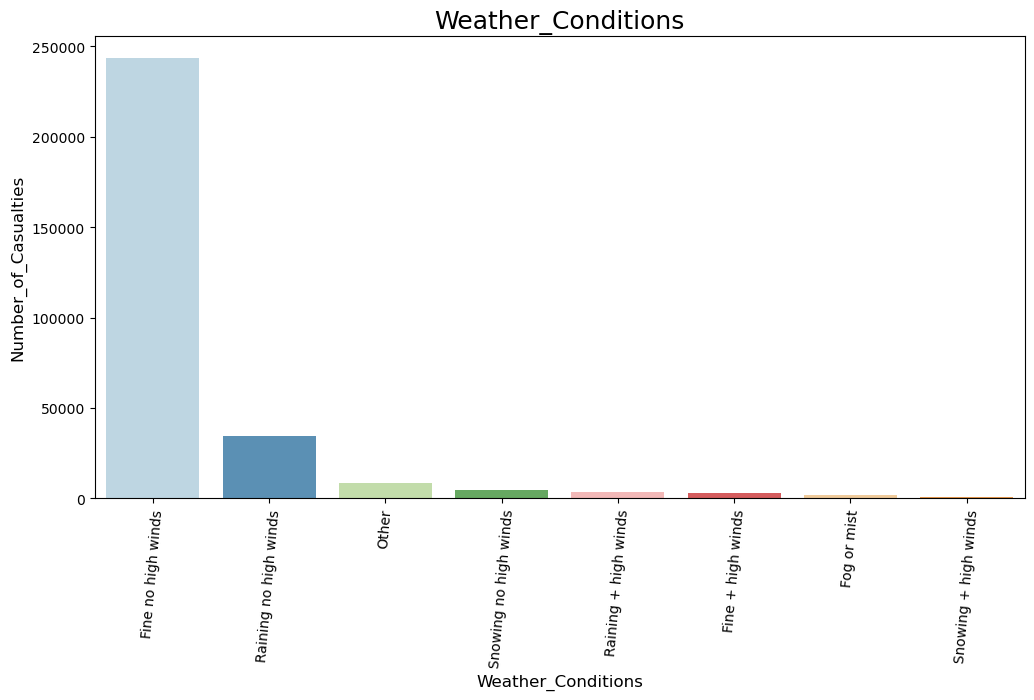

In [29]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_weather.index, y = df_weather.values, alpha=0.8,palette='Paired')
plt.title('Weather_Conditions', fontsize=18)
plt.ylabel('Number_of_Casualties', fontsize=12)
plt.xlabel('Weather_Conditions', fontsize=12)
plt.xticks(rotation=85)
plt.show()

In [30]:
df.groupby(['Weather_Conditions', 'Accident_Severity']).size().sort_values(ascending=False).reset_index(name='Number_of_Accident')[:11]

,Weather_Conditions,Accident_Severity,Number_of_Accident
0,Fine no high winds,Slight,206551
1,Fine no high winds,Serious,33520
2,Raining no high winds,Slight,30260
3,Other,Slight,7767
4,Snowing no high winds,Slight,4370
5,Raining no high winds,Serious,4094
6,Fine no high winds,Fatal,3262
7,Raining + high winds,Slight,3019
8,Fine + high winds,Slight,2650
9,Fog or mist,Slight,1427


**Interpretation**

* Fine, no high winds
  
The vast majority of accidents occur in fine weather conditions without high winds. This suggests that while adverse weather increases risk, the sheer volume of traffic in good weather leads to a higher number of accidents overall.

* Raining, no high winds

A significant number of accidents occur during rain without high winds. Wet roads reduce traction, increase stopping distances, and can impair visibility, all contributing to higher accident rates

* Snowing + high winds

Snow combined with high winds results in the fewest number of accidents in the dataset. This condition is likely less common but extremely hazardous, combining the slipperiness of snow with the control difficulties posed by high winds
  

## 8. Are certain road surface conditions associated with a higher number of casualties?
* Investigate 'Road_Surface_Conditions' and 'Number_of_Casualties' to see if factors 
like wet roads, ice, or loose surfaces correlate with increased casualties.

**How many** casualties happenned in a DRy land for example

In [31]:
df_sur = df['Road_Surface_Conditions'].value_counts()
df_sur

Road_Surface_Conditions
Dry                     203269
Wet or damp              80299
Frost or ice             11874
Snow                      4691
Flood over 3cm. deep       362
Name: count, dtype: int64

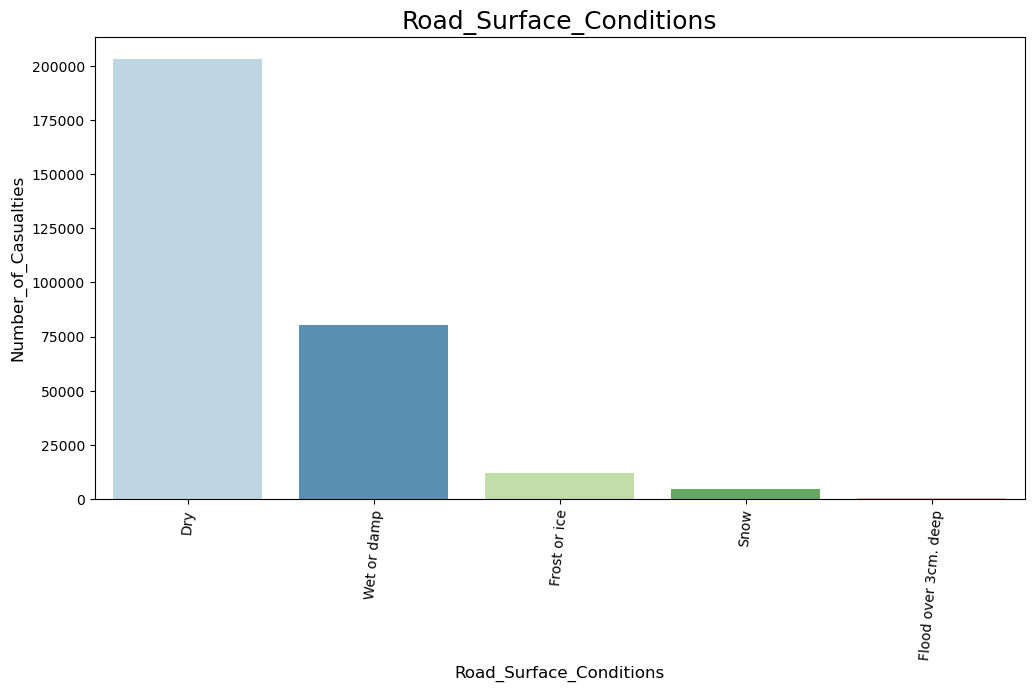

In [32]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_sur.index, y = df_sur.values, alpha=0.8,palette='Paired')
plt.title('Road_Surface_Conditions', fontsize=18)
plt.ylabel('Number_of_Casualties', fontsize=12)
plt.xlabel('Road_Surface_Conditions', fontsize=12)
plt.xticks(rotation=85)
plt.show()

**Dry Conditions Dominate**: The highest number of accidents occurs on dry roads, likely due to their prevalence and high traffic volumes. It suggests that even in optimal conditions, accidents are common, highlighting the role of driver behavior and traffic density.

**Wet Conditions Pose Significant Risks**: Wet or damp roads account for a substantial number of accidents. These conditions reduce tire grip and increase stopping distances, making accidents more likely.

**Ice and Frost are Particularly Hazardous**: Frost or ice leads to a significant number of accidents despite being less common than wet conditions. The reduced traction on icy roads makes it difficult to control vehicles, increasing the risk of accidents.

**Snow and Floods**: Snow and floods, while less frequent, present unique challenges. Snow impacts traction and visibility, while flooding poses serious risks of hydroplaning and loss of control.

## 9. Which vehicle types are involved in the most accidents?
* lets use 'Vehicle_Type' to identify the types of vehicles most frequently involved in accidents, 
such as cars, motorcycles, trucks, or bicycles.

In [33]:
df_vehicle = df.Vehicle_Type.value_counts()[:5]
df_vehicle

Vehicle_Type
Car                                     233965
Van / Goods 3.5 tonnes mgw or under      15312
Motorcycle over 500cc                    10959
Bus or coach (17 or more pass seats)      8497
Motorcycle 125cc and under                6687
Name: count, dtype: int64

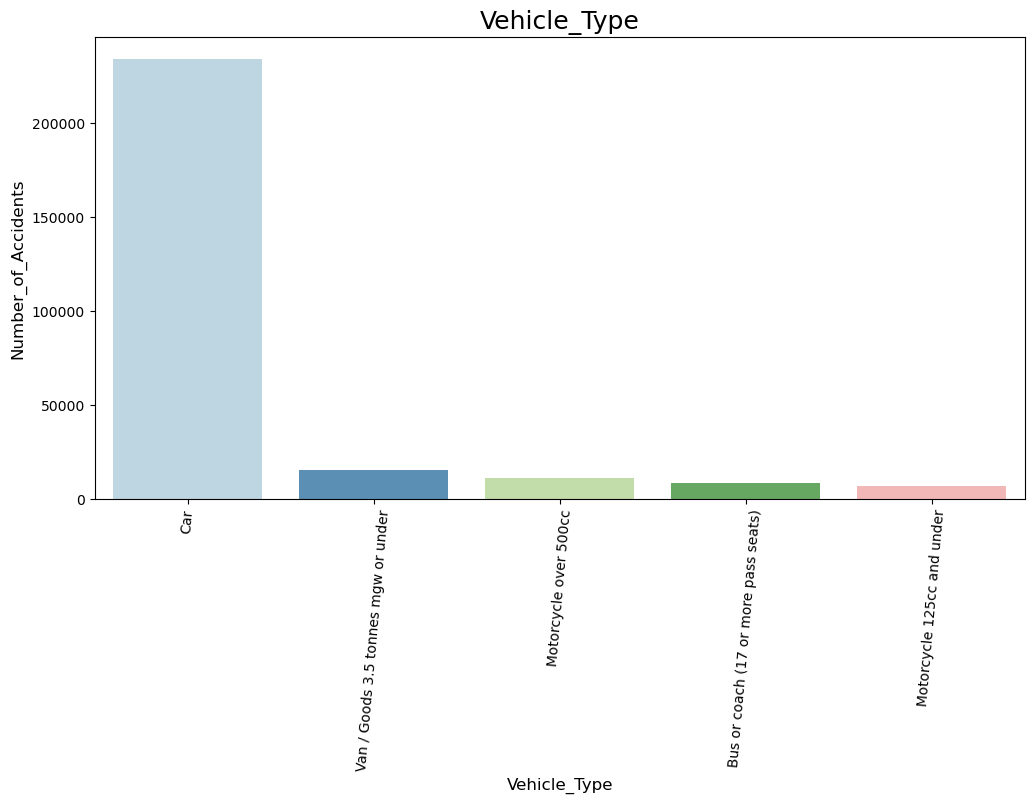

In [34]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_vehicle.index, y = df_vehicle.values, alpha=0.8,palette='Paired')
plt.title('Vehicle_Type', fontsize=18)
plt.ylabel('Number_of_Accidents', fontsize=12)
plt.xlabel('Vehicle_Type', fontsize=12)
plt.xticks(rotation=85)
plt.show()

#### Which vehicle is mostly involve in the Fatal accidents

In [35]:
df_fatal = df[df['Accident_Severity']=='Fatal']

In [36]:
df_fatal.groupby(['Vehicle_Type', 'Accident_Severity']).size().sort_values(ascending=False).reset_index(name='Number_of_Accident')[:5]

,Vehicle_Type,Accident_Severity,Number_of_Accident
0,Car,Fatal,3088
1,Van / Goods 3.5 tonnes mgw or under,Fatal,207
2,Motorcycle over 500cc,Fatal,140
3,Bus or coach (17 or more pass seats),Fatal,83
4,Motorcycle 125cc and under,Fatal,81


#### Which vehicle is mostly involve in the Slight accidents

In [37]:
df_Slight = df[df['Accident_Severity']=='Slight']

In [38]:
df_Slight.groupby(['Vehicle_Type', 'Accident_Severity']).size().sort_values(ascending=False).reset_index(name='Number_of_Accident')[:5]

,Vehicle_Type,Accident_Severity,Number_of_Accident
0,Car,Slight,199788
1,Van / Goods 3.5 tonnes mgw or under,Slight,13020
2,Motorcycle over 500cc,Slight,9348
3,Bus or coach (17 or more pass seats),Slight,7292
4,Motorcycle 125cc and under,Slight,5696


**High Incidence with Cars:** The highest number of accidents involves cars, reflecting their dominance on the roads. The high accident rate underscores the need for targeted safety measures for car drivers.

**Commercial Vehicles:** Vans and light goods vehicles also see a significant number of accidents. This can be attributed to their extensive use in deliveries and commercial transport, often involving high mileage and frequent stops.

**Motorcycles' Vulnerability:** Both large and small motorcycles are involved in a notable number of accidents. Motorcyclists face higher risks due to less protection compared to car drivers, and their visibility to other road users can be an issue.

**Public Transport:** Buses and coaches, despite their size and the number of passengers they carry, have fewer accidents compared to personal vehicles, likely due to professional drivers and regulated routes but still present significant safety concerns given their passenger capacity.

## 10. Is there a correlation between road speed limits and accident severity?
* Compare 'Speed_limit' with 'Accident_Severity' to determine if higher speed limits lead to more severe accidents.

In [39]:
df.groupby(['Speed_limit', 'Accident_Severity']).size().sort_values(ascending=False).reset_index(name='Number_of_Accident')[:5]

,Speed_limit,Accident_Severity,Number_of_Accident
0,30,Slight,169380
1,60,Slight,36046
2,30,Serious,23617
3,40,Slight,21544
4,70,Slight,18806


In [40]:
df_filtered = df[['Speed_limit', 'Accident_Severity']]

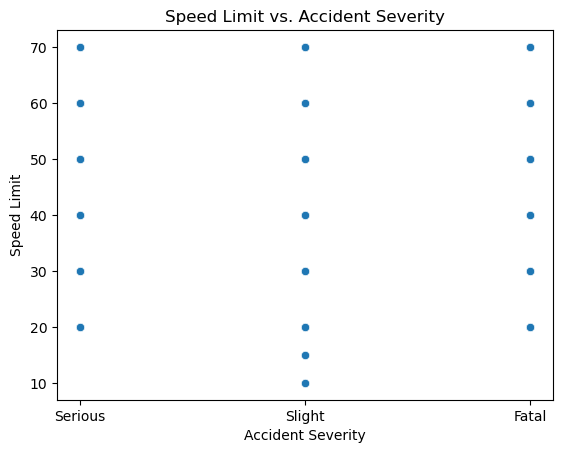

In [41]:
sns.scatterplot(y='Speed_limit', x='Accident_Severity', data=df_filtered)
plt.title('Speed Limit vs. Accident Severity')
plt.ylabel('Speed Limit')
plt.xlabel('Accident Severity')
plt.show()

In [42]:
df_st = df[df['Speed_limit']>=70]


In [43]:
df_sev =  df_st['Accident_Severity'].value_counts()
df_sev

Accident_Severity
Slight     18806
Serious     2673
Fatal        492
Name: count, dtype: int64

## 11. Does the urban or rural area classification influence accident characteristics?
* Analyze 'Urban_or_Rural_Area' alongside accident details to see if there are differences in accident types, 
severity, or causes between urban and rural areas

In [44]:
df_area = df.Urban_or_Rural_Area.value_counts()
df_area

Urban_or_Rural_Area
Urban    193341
Rural    107154
Name: count, dtype: int64

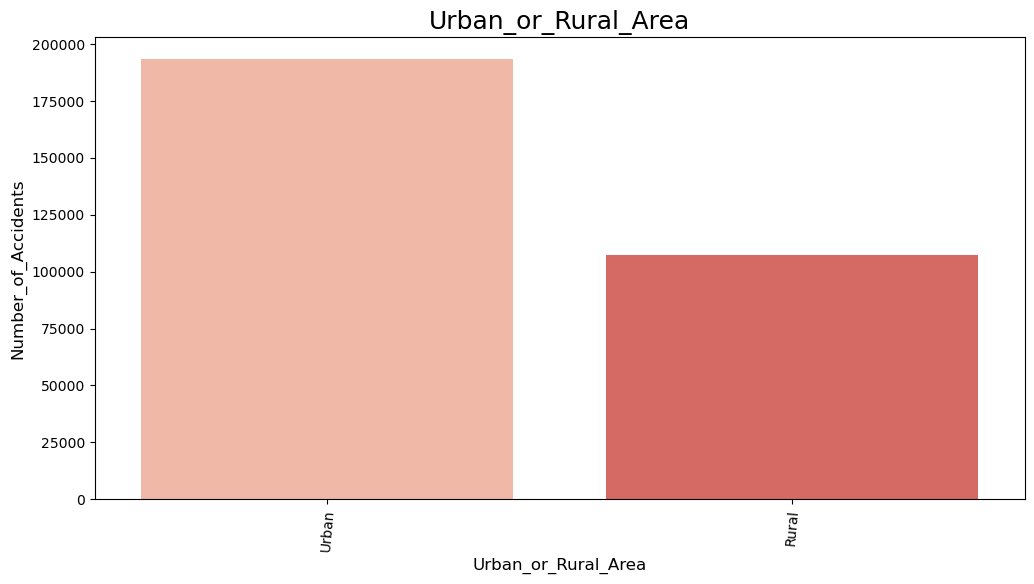

In [45]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,6))
sns.barplot(x = df_area.index, y = df_area.values, alpha=0.8,palette='Reds')
plt.title('Urban_or_Rural_Area', fontsize=18)
plt.ylabel('Number_of_Accidents', fontsize=12)
plt.xlabel('Urban_or_Rural_Area', fontsize=12)
plt.xticks(rotation=85)
plt.show()

**Higher Frequency in Urban Areas:** The higher number of accidents in urban areas reflects the concentration of traffic and complex driving conditions. Urban environments often have more vehicles, pedestrians, and cyclists, leading to a greater likelihood of collisions.

**Significant Risk in Rural Areas:** Despite fewer vehicles, rural areas still see a substantial number of accidents. Factors such as higher speeds, sharp bends, limited lighting, and the presence of wildlife can contribute to the risk of accidents in these regions.